In [5]:
import pandas as pd
import re

def load_fasttext_file(path):
    texts = []
    labels = []
    with open(path, 'r', encoding='utf-8', errors='ignore') as f:
        for line in f:
            # fastText format: __label__X <text>
            parts = line.strip().split(' ', 1)
            if len(parts) == 2 and parts[0].startswith('__label__'):
                label = parts[0].replace('__label__', '')
                text = parts[1]
                labels.append(int(label))
                texts.append(text)
    return pd.DataFrame({'label': labels, 'text': texts})

# wczytaj dane
train = load_fasttext_file('data/raw/train.ft.txt')
test  = load_fasttext_file('data/raw/test.ft.txt')

print("Train shape:", train.shape)
print("Test shape:", test.shape)

train.head()


Train shape: (41611, 2)
Test shape: (37087, 2)


,label,text
0,2,Stuning even for the non-gamer: This sound tra...
1,2,The best soundtrack ever to anything.: I'm rea...
2,2,Amazing!: This soundtrack is my favorite music...
3,2,Excellent Soundtrack: I truly like this soundt...
4,2,"Remember, Pull Your Jaw Off The Floor After He..."


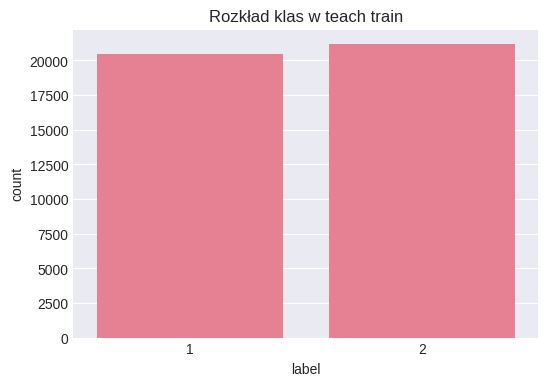

,count
label,
2,21162
1,20449


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# rozkład sentymentów
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=train)
plt.title("Rozkład klas w teach train")
plt.show()

train['label'].value_counts()


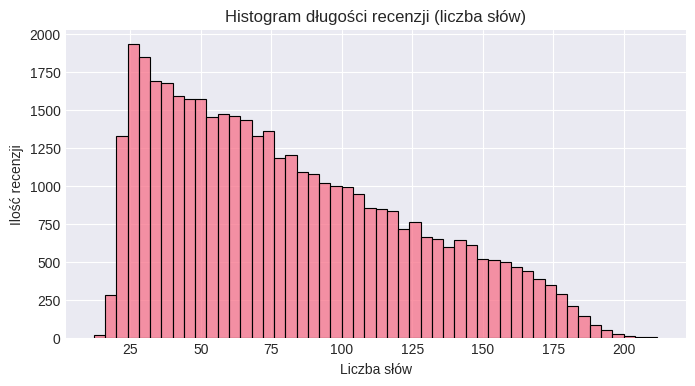

In [7]:
train['length'] = train['text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(8,4))
sns.histplot(train['length'], bins=50)
plt.title("Histogram długości recenzji (liczba słów)")
plt.xlabel("Liczba słów")
plt.ylabel("Ilość recenzji")
plt.show()


In [8]:
# sortuj według długości
train.sort_values(by='length', ascending=False).head(5)


,label,text,length
6784,1,A VERY VERY VERY SORRY GAME: this game will ne...,212
25908,2,the best emotional punk rock band ever - MEST:...,211
10909,1,THIS SUCKS STAY AWAY: BUYER BEWARE ! ! !YES TH...,209
8257,2,cabin-worthy: Live in New Mexico and have a su...,207
6576,2,I love it Ray J has soul!: I love this cd so m...,205


In [9]:
print("Przykłady negatywnych recenzji:")
for t in train[train['label']==1]['text'].sample(5, random_state=42):
    print("-", t[:200], "...")

print("\nPrzykłady pozytywnych recenzji:")
for t in train[train['label']==2]['text'].sample(5, random_state=42):
    print("-", t[:200], "...")


Przykłady negatywnych recenzji:
- Photosmart pretty dumb: Bought Photosmart 1100 three months ago. Loved it till it thought my color cartridge was bad. Now printer will not recognize any new cartridge. Seems there's a hardware bug tha ...
- not for small kids: I was shocked thatthis had a G rating with the language used. Not for small kids who are impressionable and repeat what they hear. Other than that a good fanatsy story. ...
- Things go "DUD" in the night: Once again a remake takes a "Classic" film "The Haunting"(the best haunted house movie ever) and retooled it as an effects driven mess. Did they even watch the original o ...
- Canon Telephoto TDC 10: This is not worth any amount of money if you take even a small amount of pride in your photos. Sadly it is the only one I find available for an otherwise acceptable camera but  ...
- More bad songs than good: Yes, System of a Down have made some great songs here on Toxicity, but they have also put out some garbage ones that make yo